In [48]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

## Linear Equation

Gaussian elimination. Implement it. Do it once in your life. The use `np.linalg.solve` for the rest.

In [49]:
def forward_elim(A, B):
    L = A.copy()
    R = B.copy()
    
    n_row, n_col = L.shape
    for p in range(n_row): # pivot index
        for j in range(p+1, n_row): # row to eliminate
            c = - L[j, p]/L[p, p]
            R[j] = R[j] + c*R[p]
            L[j] = L[j] + c*L[p]
    return L, R # U matrix, the new rhs

def backward_sub(L, R):
    n, _ = L.shape
    answer = np.zeros(n)
    for j in range(n-1, -1, -1):
        offset = sum(L[j,i] * answer[i] for i in range(j+1, n))
        answer[j] = 1/L[j,j]*(R[j] - offset)
    return answer

def matrix_solve(A, B): # gaussian elimination
    L, R = forward_elim(A, B)
    return backward_sub(L, R)

A = np.array([
    [1., 1, 1],
    [2., 4, 3], # typo
    [-1, 1, -2] # typo
])

B = np.array([
    6, 19, -5.
])

L, R = forward_elim(A, B) 
ans = backward_sub(L, R)
print(L, R)
print(ans)

A @ ans

[[ 1.  1.  1.]
 [ 0.  2.  1.]
 [ 0.  0. -2.]] [ 6.  7. -6.]
[1. 2. 3.]


array([ 6., 19., -5.])

In [50]:
np.random.seed(5555)
A = np.random.random((100,100))
B = np.random.random(100)

C = matrix_solve(A, B)

A @ C - B
# A x C - B

array([ 1.44328993e-15,  2.44249065e-15,  6.66133815e-16,  3.66373598e-15,
        2.33146835e-15,  3.77475828e-15,  1.33226763e-15,  1.66533454e-15,
        1.43218770e-14,  2.57571742e-14,  4.55191440e-15, -3.38618023e-14,
       -1.75415238e-14,  5.67323966e-14, -2.83106871e-14,  1.38777878e-14,
        2.14273044e-14, -2.55351296e-14,  7.70494779e-14, -7.20534743e-14,
        3.30846461e-14,  3.26405569e-14, -2.34257058e-14, -3.73034936e-14,
        6.21724894e-15, -1.07691633e-13, -3.24185123e-14, -6.96109836e-14,
       -7.27196081e-14, -9.60342916e-14,  7.60502772e-14, -4.48530102e-14,
        1.53876911e-13,  6.03961325e-14, -2.07611706e-14,  5.95079541e-14,
       -1.01030295e-14,  8.12683254e-14,  4.41868764e-14,  4.96269692e-14,
       -6.50590692e-14,  1.85407245e-14,  3.58602037e-14, -1.84297022e-14,
        2.67563749e-14,  1.20292665e-13, -3.90798505e-14, -3.97459843e-14,
       -1.31783473e-13,  1.84297022e-14, -2.88657986e-15, -2.32480701e-13,
        3.54161145e-14, -

### Linear Regression

    1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [51]:
import pandas as pd
import os
data_x, data_y = np.loadtxt("C:\\uni\Y3T1\\num_com\exercise\\4\linear.txt")



2) Plot `data_x` vs `data_y`

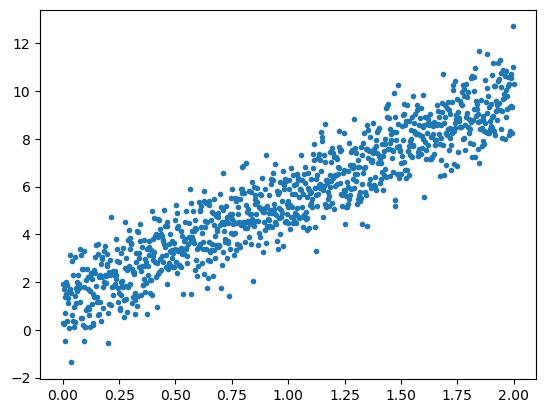

In [52]:
plt.plot(data_x, data_y, '.')




3) What what is the equation for a striaght line?

In [53]:
# y = mx+ c

4) What is the difference between a "good line" and a "bad line"?

In [54]:
# Sum of error away from all points should my optimum minimum.
data_x.shape


(1000,)

5) What are we trying to adjust to minimize the $\chi^2$?

In [55]:

# def f(m, x, c):
#     
# 
# def a(x):
#     return x**2
# 
# def b(x):
#     return x

n = data_x

A = np.array([
    [sum( [a(data_x) for a in xs] )],
    [sum( [b(data_x) for b in xs] )],
    [sum( [b(data_y) for b in xs] )],
    [n]
])

B = np.array([])
        

        
        

NameError: name 'xs' is not defined

6) How do we findind the minimum of $\chi^2$? Whare are they?

In [ ]:
# slope is 0

7) Find the best slope and the best intercept.

In [ ]:
#?

8) Plot the line along with the data point to verify that you actually got the right answer.

In [ ]:
#

9) What is your prediction for the value of `y` when `x`=3.0?

In [56]:
#

### Generalization

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

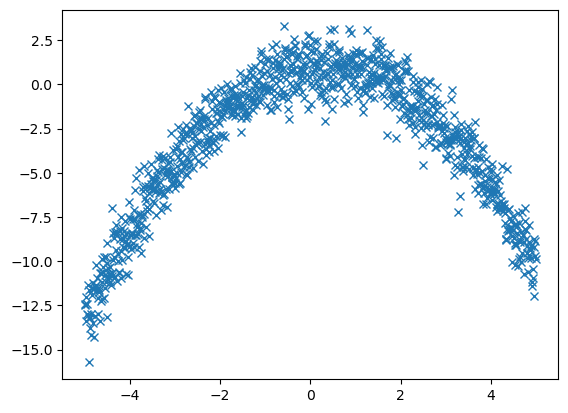

In [80]:
data_x, data_y = np.loadtxt('C:\\uni\Y3T1\\num_com\exercise\\4\parabola.txt')
plt.plot(data_x, data_y,'x')

2) What is the general form for parabola?


In [ ]:
def fit(xs, ys):
    def s(nx, ny):
        return sum(xs**nx * ys**ny)
    
    n = len(xs)
    A = np.array([
        [s(4, 0), s(3, 0), s(2, 0)], 
        [s(3, 0), s(2, 0), s(1, 0)], 
        [s(2, 0), s(1, 0), s(0, 0)]
    ])
    B = np.array([s(2, 1), s(1, 1), s(0, 1)])
    a, b, c = matrix_solve(A, B)
    return a, b, c

a, b, c = fit(data_x, data_y)
print(a, b, c)
xs = np.linspace(-7, 7, 100)
plt.scatter(data_x, data_y, alpha=0.5, s=2, marker='x')
plt.plot(xs, a*xs**2 + b*xs+c, 'r')


3) What is the difference between a "good line" and a "bad line"?

4) What are we trying to minimize in order to find the best parabola?

5) Find the best fitted parabola and plot to verify.

# Higher Dimension.

Also, there is no need to stop at 2 dimension.

In [90]:
np.random.seed(1234567)
def gen_child_height_sample(n_data=100):
    father_height = np.random.randn(n_data)*20 + 170
    mother_height = np.random.randn(n_data)*20 + 160
    # just pretend you didn't see this
    child_height = 0.8*mother_height + 0.2*father_height + 5 + np.random.randn(n_data)*10
    return father_height, mother_height, child_height

father_height, mother_height, child_height = gen_child_height_sample()


We have a reason to believe that a child height is a linear combination of mother's and father's height.

$$
h_{child} = c_{mom} \times h_{mom} + c_{dad} \times h_{dad} + h_0
$$

1.) Plot mother_height vs child_height and father_height vs child_height.

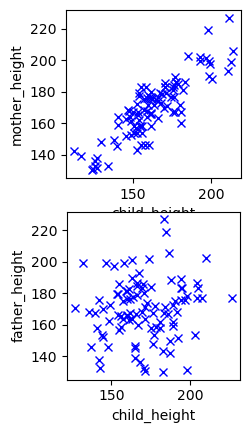

In [121]:
plt.subplot(211, aspect='equal')
plt.xlabel('child_height')
plt.ylabel('mother_height')
plt.plot(mother_height, child_height, 'bx')

plt.subplot(212, aspect='equal')
plt.xlabel('child_height')
plt.ylabel('father_height')
plt.plot(father_height, child_height, 'bx')

plt.show()


2.) Find appropriate $c_{mom}$ and $c_{dad}$

3) Now that you can't really plot the line on top of distribution to check the answer anymore since you have more than 2 dimensions.

Try plot $h_{child, predicted}$ vs $h_{child, data}$. What do you expect to see and did you get what you expect?

## Even More generalization. Power Law.

Most of physics formula comes in the form of

$Y = K \times A^\alpha B^\beta C^\gamma$

Ex:
- $ F = ma$
- $ K = \frac{1}{2} m v^2$
- $ c = \frac{1}{\sqrt{\mu_0, \epsilon_0}}$

1) How do we turn power law in to linear relation?

2) Turn this in to a linear equation.

3) If we still have time.

Pretend that you are bad at physics and don't know how to calculate kinetic energy from velocity.

Your guess is

$$
K = cv^\alpha
$$

find $c$ and $\alpha$

In [60]:
np.random.seed(7383672)
def gen_kinetic(n_data=100):
    v = np.random.rand(n_data)*10
    m = 3.33
    k = 1/2*m*v**2*(1+np.random.randn(n_data)*0.05)
    v 
    return v, k

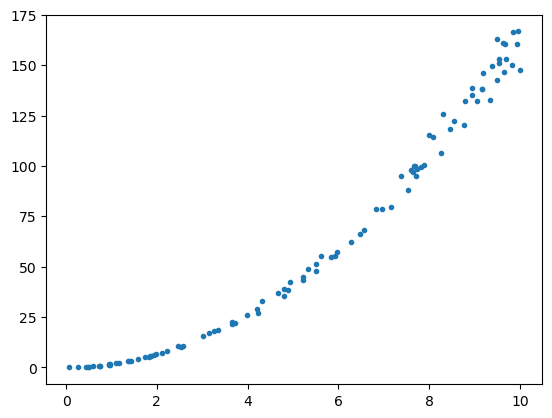

In [61]:
v, k = gen_kinetic()
plt.plot(v, k, '.')